# Plotting Unemployment Rates in the US for Recent Historical Events  (Jan 1948-April 2020)



Data obtained from the US Bureau of Labour Statistics: 
https://www.bls.gov/cps/data.htm

In order to get the exact data from the url above, go to the "One-Screen Data Search" for Labour Statistics. In section 7 select "Unemployment Rate" and in section 9 select "Monthly". After getting the data adjust the time frame to the maximum range of data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Monthly Unemployment Rates 1948-present.csv to Monthly Unemployment Rates 1948-present.csv


In [0]:
MUR_raw = pd.read_csv('Monthly Unemployment Rates 1948-present.csv')
MUR = MUR_raw.iloc[11:]
MUR = MUR.rename(columns=MUR_raw.iloc[10,:])
MUR = MUR.set_index('Year')

In [4]:
MUR

Jan  Feb  Mar   Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                             
1948  3.4  3.8  4.0   3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4.0
1949  4.3  4.7  5.0   5.3  6.1  6.2  6.7  6.8  6.6  7.9  6.4  6.6
1950  6.5  6.4  6.3   5.8  5.5  5.4  5.0  4.5  4.4  4.2  4.2  4.3
1951  3.7  3.4  3.4   3.1  3.0  3.2  3.1  3.1  3.3  3.5  3.5  3.1
1952  3.2  3.1  2.9   2.9  3.0  3.0  3.2  3.4  3.1  3.0  2.8  2.7
...   ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...
2016  4.9  4.9  5.0   5.0  4.8  4.9  4.8  4.9  5.0  4.9  4.7  4.7
2017  4.7  4.6  4.4   4.4  4.4  4.3  4.3  4.4  4.2  4.1  4.2  4.1
2018  4.1  4.1  4.0   4.0  3.8  4.0  3.8  3.8  3.7  3.8  3.7  3.9
2019  4.0  3.8  3.8   3.6  3.6  3.7  3.7  3.7  3.5  3.6  3.5  3.5
2020  3.6  3.5  4.4  14.7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[73 rows x 12 columns]

First i'll explore other recent events and their impacts on unemployment. This will help us get a better idea of how long the economy takes to recover and provide insights into how long the economy may take to recover after COVID-19. Unemployment is only a single potential indicator of economic status but can give us general ideas for the overall status of the economies well-being. 

In [5]:
# create a vector for the x-axis values for any plot we may wish to create
time_axis = []

for i in range(1948, 2021, 1):
  for j in range(1,13):
    time_axis.append(f'{i}-{j}-01')

#plt.plot()
time_axis = pd.to_datetime(time_axis)
time_axis

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq=None)

In [0]:
MUR_1_col = []

for i in range(0,73,1):
  for j in range(0,12,1):
      MUR_1_col.append(MUR.iat[i,j])

MUR0 = pd.DataFrame(data = MUR_1_col, index = time_axis) 
MUR0 = MUR0.iloc[:-8,:]
MUR0.columns = ['Percent']
MUR0['Months'] = MUR0.index

col = MUR0.pop("Months") # cut the Months column from where it was at the end of the table
MUR0.insert(0, col.name, col) # insert the column at column 0 of the data frame

MUR0.index = np.arange(0,868)

In [0]:
# Final monthly unemployment rate data organized into a single column
MUR0.Percent = MUR0.Percent.astype('float')

In [8]:
print(MUR0.Percent.dtype)
MUR0

float64


Months  Percent
0   1948-01-01      3.4
1   1948-02-01      3.8
2   1948-03-01      4.0
3   1948-04-01      3.9
4   1948-05-01      3.5
..         ...      ...
863 2019-12-01      3.5
864 2020-01-01      3.6
865 2020-02-01      3.5
866 2020-03-01      4.4
867 2020-04-01     14.7

[868 rows x 2 columns]

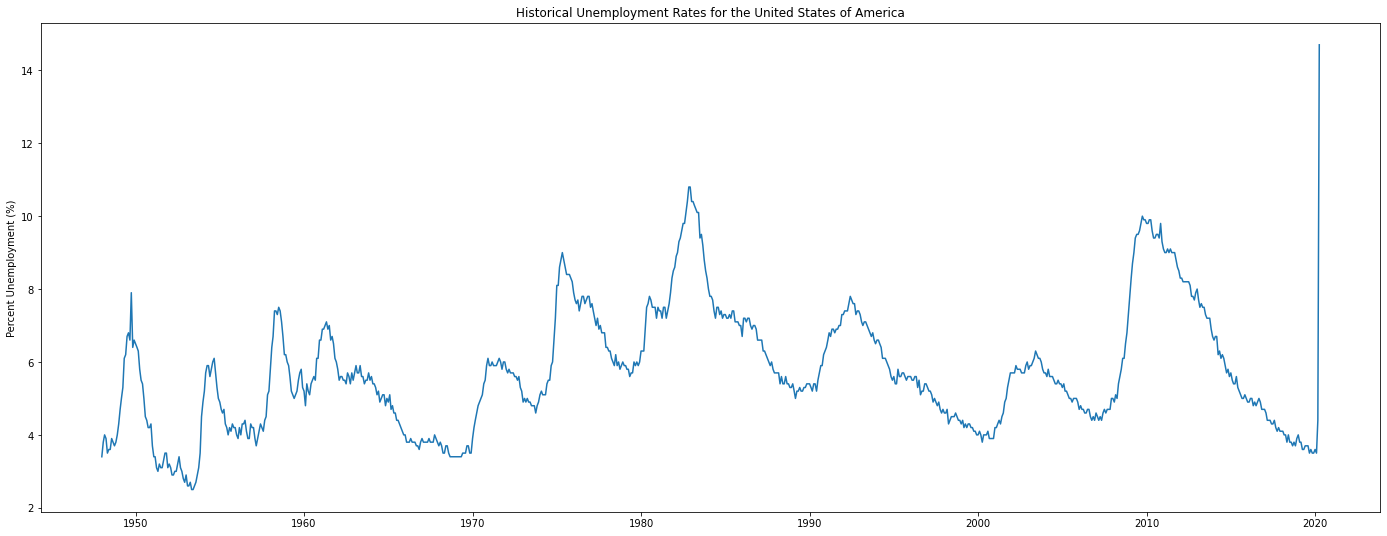

In [10]:
#Complete Data Set
fig,ax = plt.subplots()
fig.set_size_inches(24,9)
fig.set_facecolor('w')
plt.plot(MUR0.iloc[:,0], MUR0.iloc[:,1]) # dont plot the Nan values at the end of 2020 which data doesnt exist for yet.

plt.ylabel('Percent Unemployment (%)')
plt.title('Historical Unemployment Rates for the United States of America')
plt.show()

## 2008/2009 Global Economic Recession

Typically an economy is considered to be in decent shape when the unemployment rate is below 5%. (**source...)

2009-10-01 00:00:00


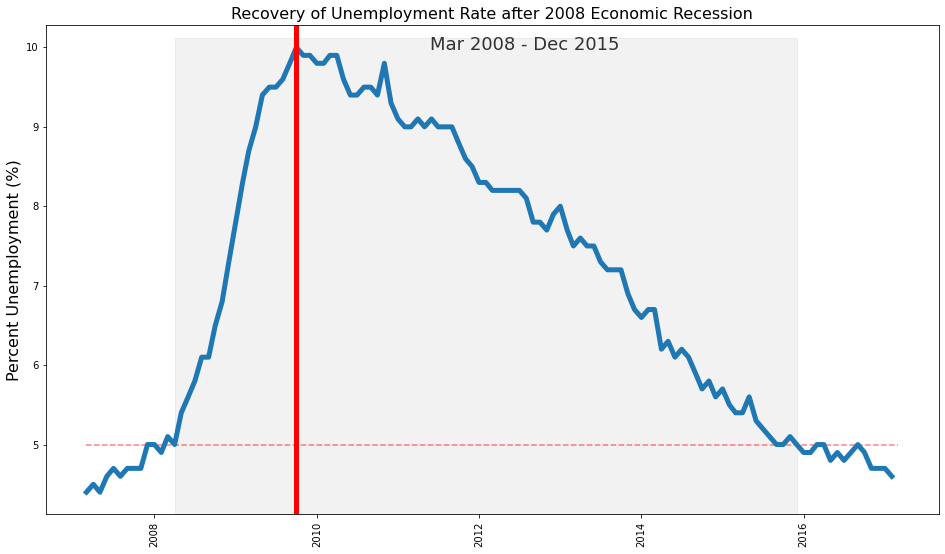

In [16]:
# can modify these values
start_time = MUR0.loc[MUR0.Months == np.datetime64('2007-03-01')].index[0]
years_of_interest = 10

# sets the time frame of the plot
time_frame = years_of_interest*12
end_time = (start_time + time_frame)
if end_time > 868:
  end_time = 868
else:
  end_time = (start_time + time_frame)

max_location = MUR0.loc[MUR0.Percent == max(MUR0.iloc[start_time:end_time,1])]
max_loc = MUR0.iat[max_location.index[0],0]

# plot the unemployment rate
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

#plt.xaxis()
plt.plot(MUR0.iloc[start_time:end_time,0], MUR0.iloc[start_time:end_time,1], linewidth = '5') # dont plot the Nan values at the end of 2020 which data doesnt exist for yet.
print(max_loc)
# plot the 5% unemployment line and lines at the maximum and 5% crossings
plt.hlines(5, xmin=MUR0.iat[start_time,0], xmax=MUR0.iat[end_time,0], linestyles='--', color = 'r',alpha = 0.5)
plt.axvline(x=max_loc, ymin=0, ymax=1, linewidth = '5', color ='r')

#highlight area of interest
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),MUR0.iat[start_time+13,0], MUR0.iat[start_time+105,0], color='k',alpha=0.05)
ax.text(0.43,0.95, "Mar 2008 - Dec 2015", fontsize=18, color='k', alpha=0.8, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

plt.ylabel('Percent Unemployment (%)', fontsize = 16)
plt.title('Recovery of Unemployment Rate after 2008 Economic Recession', fontsize=16)
plt.show()


From this we are able to see that the unemployment peaks during the 2008 recession during November 2009 and the unemployment rate does not return to below 5% for 6 years after the peak.

## Now to visualize the 1957 influenza

1958-07-01 00:00:00


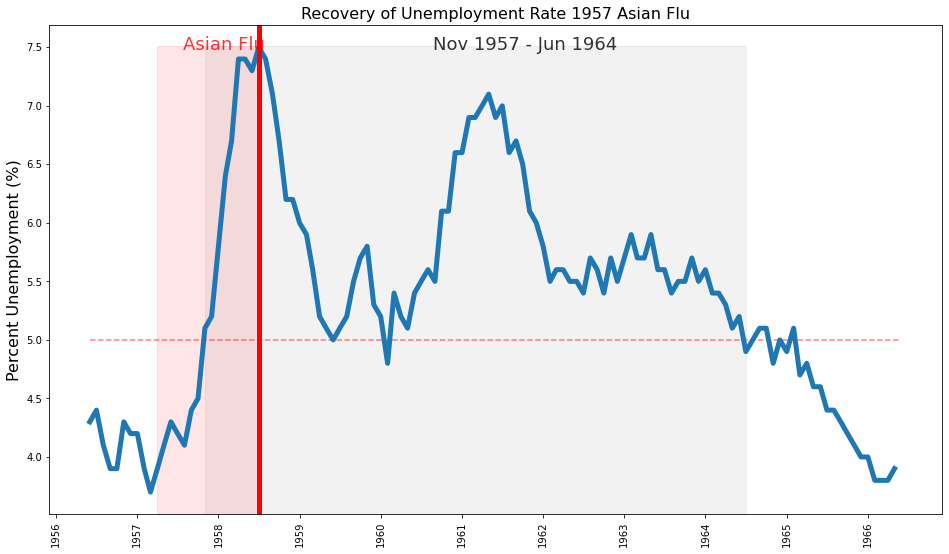

In [17]:
# Should only have to modify these values and some of the aesthetic labels and stuff
start_time = MUR0.loc[MUR0.Months == np.datetime64('1956-06-01')].index[0]
years_of_interest = 10

# sets the time frame of the plot
time_frame = years_of_interest*12
end_time = (start_time + time_frame)
if end_time > 868:
  end_time = 868
else:
  end_time = (start_time + time_frame)

max_location = MUR0.loc[MUR0.Percent == max(MUR0.iloc[start_time:end_time,1])]
max_loc = MUR0.iat[max_location.index[0],0]

# plot the unemployment rate
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

#plt.xaxis()
plt.plot(MUR0.iloc[start_time:end_time,0], MUR0.iloc[start_time:end_time,1], linewidth = '5') # dont plot the Nan values at the end of 2020 which data doesnt exist for yet.
print(max_loc)
# plot the 5% unemployment line and lines at the maximum and 5% crossings
plt.hlines(5, xmin=MUR0.iat[start_time,0], xmax=MUR0.iat[end_time,0], linestyles='--', color = 'r',alpha = 0.5)
plt.axvline(x=max_loc, ymin=0, ymax=1, linewidth = '5', color ='r')

#highlight area of interest
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),MUR0.iat[start_time+17,0], MUR0.iat[start_time+97,0], color='k',alpha=0.05)
ax.text(0.43,0.95, "Nov 1957 - Jun 1964", fontsize=18, color='k', alpha=0.8, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

#highlight area of interest
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),MUR0.iat[start_time+10,0], MUR0.iat[start_time+25,0], color='r',alpha=0.1)
ax.text(0.15,0.95, "Asian Flu", fontsize=18, color='r', alpha=0.8, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

plt.ylabel('Percent Unemployment (%)', fontsize = 16)
plt.title('Recovery of Unemployment Rate 1957 Asian Flu', fontsize=16)
plt.show()

For the 1957 imfluenza we can see the max unemployment of 7.5% occurs in july 1958 and the rate does not steadily drop below 5% for aproximately 6 years. Although unemployment rate does drop briefly just after the 1957 pandemic 

## Apparently There Exists US Census Bureau Data Somewhere with annual unemployment rates for before 1947 so we could look at 1918 Spanish Flu and the Great Depression but I cant find the Data...

# COVID-19 plotting cases againt unemployment for up to april 2020

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving daily-cases-covid-19 (for employment comparison).csv to daily-cases-covid-19 (for employment comparison) (1).csv


In [0]:
covid = pd.read_csv('daily-cases-covid-19 (for employment comparison) (1).csv')

In [0]:
#Lets look at the data we have
covid.sample(15)


Entity Code          Date  Daily confirmed cases (cases)
13800  Philippines  PHL  Apr 28, 2020                            198
13493       Panama  PAN  May 10, 2020                            212
11889      Myanmar  MMR  Apr 22, 2020                              2
455        Algeria  DZA  May 10, 2020                            189
2027       Belarus  BLR  Apr 29, 2020                            919
13887     Portugal  PRT   Mar 3, 2020                              2
2457       Bolivia  BOL   May 1, 2020                             57
16526  Switzerland  CHE  Mar 15, 2020                            238
3906         Congo  COG   Apr 9, 2020                             15
2933      Bulgaria  BGR  May 11, 2020                             10
1652       Bahamas  BHS   May 6, 2020                              6
7596   High income  NaN  Apr 22, 2020                          62266
7670      Honduras  HND   May 4, 2020                             45
2650        Brazil  BRA  Jan 29, 2020                              0
8232          Iran  IRN  Jan 17, 2020                              0

In [0]:
#It seems we are dealing with multiple different levels of scale. Lets inspect Entity more closely
covid.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethio

In [0]:
#I'm interested in the world, so I'll filter the rest out
covid_us = covid[covid.Entity == 'United States']

#Entity and Code are useless to us now, so filter those out as well
covid_us = covid_us.loc[:,['Date','Daily confirmed cases (cases)']]
covid_us = covid_us.set_index('Date')

#The column label for cases is too large, rename it
covid_us.columns = ['New_Cases']

#Convert the Date object to datetime
covid_us.index = pd.to_datetime(covid_us.index)

#I am also interested in the total confirmed cases
covid_us['Total_Cases'] = covid_us.New_Cases.cumsum()

covid_us.head(15)

New_Cases  Total_Cases
Date                              
2019-12-31          0            0
2020-01-01          0            0
2020-01-02          0            0
2020-01-03          0            0
2020-01-04          0            0
2020-01-05          0            0
2020-01-06          0            0
2020-01-07          0            0
2020-01-08          0            0
2020-01-09          0            0
2020-01-10          0            0
2020-01-11          0            0
2020-01-12          0            0
2020-01-13          0            0
2020-01-14          0            0

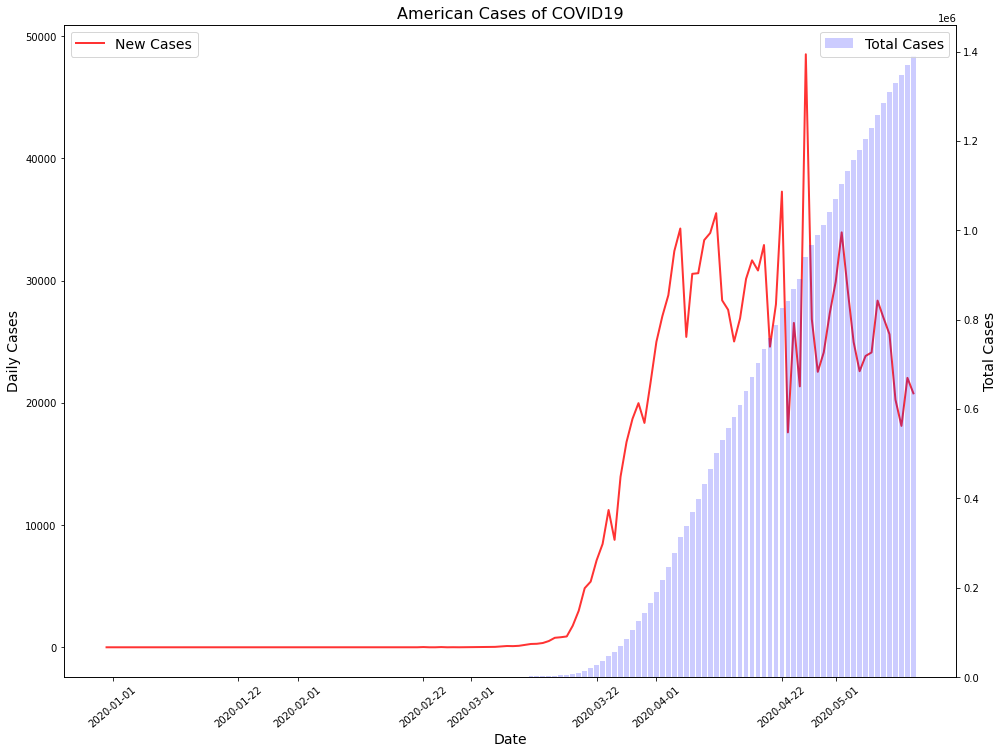

In [0]:
#Lets visualize this data
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')

ax.plot(covid_us.New_Cases, label = 'New Cases', color='r',linewidth=2, alpha = 0.8)
ax.set_ylabel('Daily Cases', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels,rotation=40) #Rotate xlabels to avoid clustering
ax.set_xlabel('Date', fontsize=14)
plt.legend(fontsize=14, loc='upper left')

#Plot total cases as bar plot on different y-axis for scale.
ax_tot = ax.twinx()
ax_tot.bar(covid_us.index,covid_us.Total_Cases, label = 'Total Cases', color='b',alpha = 0.2)
ax_tot.set_ylabel('Total Cases', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

plt.title('American Cases of COVID19', fontsize=16)
plt.show()

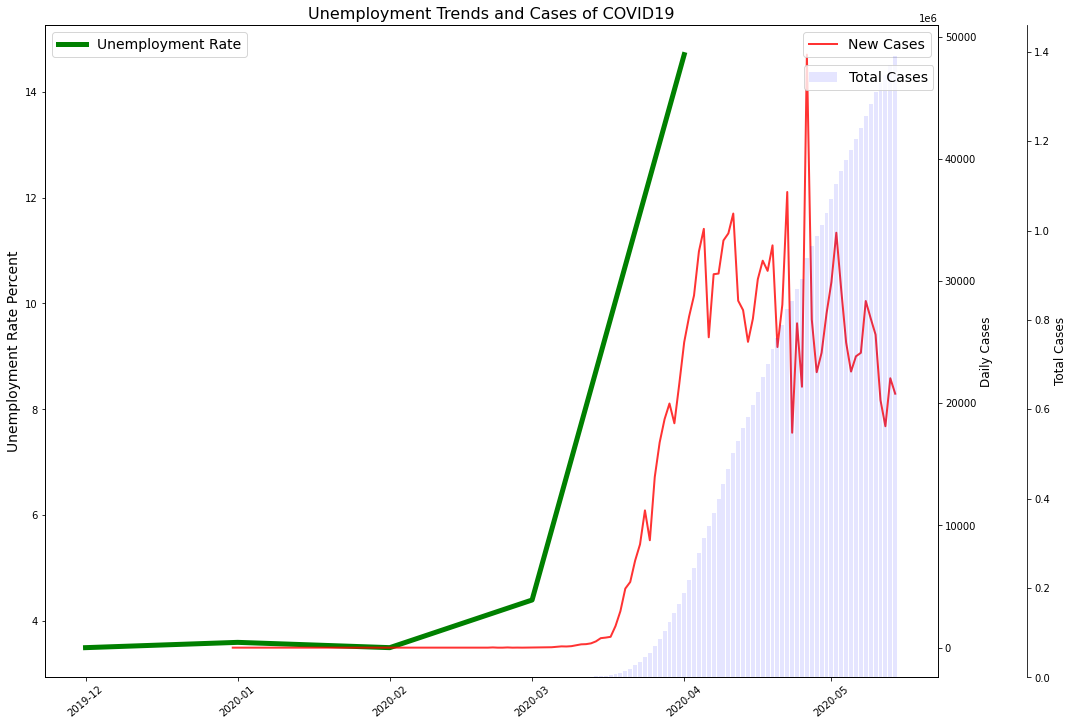

In [0]:
#Get the inital timestamp for our covid data
start_date = covid_us.index[0]

#Filter out data before start date
MUR0_comparison = MUR0.loc[MUR0.Months == np.datetime64(f'{str(start_date)[:-11]}'+'01')].index
MUR0_compare = MUR0.iloc[MUR0_comparison[0]:,:]
MUR0_compare = MUR0_compare.set_index('Months')

#Visualize
fig, ax_cov = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')

#Start with Unemployment Trend axis
plt.plot(MUR0_compare.index, MUR0_compare.Percent, label='Unemployment Rate', color='g', linewidth=5, alpha=1)
ax_cov.set_ylabel('Unemployment Rate Percent', fontsize=14)
xlabels = ax_cov.get_xticklabels()
ax_cov.set_xticklabels(xlabels,rotation=40) #Rotate xlabels to avoid clustering
plt.legend(fontsize=14, loc='upper left')

#Plot Both Daily and Total cases on different y axis
ax = ax_cov.twinx()
ax.plot(covid_us.New_Cases, label = 'New Cases', color='r',linewidth=2, alpha = 0.8)
ax.set_ylabel('Daily Cases', fontsize=12)
ax.set_xlabel('Date', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

ax_tot = ax_cov.twinx()
ax_tot.spines["right"].set_position(("axes", 1.1))
ax_tot.bar(covid_us.index,covid_us.Total_Cases, label = 'Total Cases', color='b',alpha = 0.1)
ax_tot.set_ylabel('Total Cases', fontsize=12)
plt.legend(loc=(0.85,0.9),fontsize=14)

plt.title('Unemployment Trends and Cases of COVID19', fontsize=16)
plt.show()

We see that unemployment rate increases rapidly before cases are reported due to the difference between implementation of quarantine measures (which varies between states). Also Unemployment rate is only reported on a monthly basis so this plot may not be the most useful or representative of anything. Also the axes are whack since unemployment rate has so few values to show a trend and is also representing drastically different information...

# Canada Unemployment Rate (~1965 - Apr 2020)
